# SVM Tuning

In [1]:
from sklearn.model_selection import train_test_split

from assignment_2.digits_classifiers.model import Dataset, ClassifierTuning
from assignment_2.digits_classifiers.classifiers import RandomForest
from assignment_2.digits_classifiers.io import read_datasets

## Import dataset

In [2]:
data = read_datasets()

2022-12-14 15:30:12.547 | INFO     | assignment_2.digits_classifiers.io:read_datasets:40 - Reading datasets


In [3]:
X, y = data

## Removing constant columns

In [4]:
always_zero = [c for c in list(X.columns) if sum(X.loc[:, c]) == 0]

In [5]:
X.drop(columns=always_zero, axis=1, inplace=True)

## Discard part of data

In [6]:
X, _, y, _ = train_test_split(X, y, test_size=0.95)

## Train Test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)

In [8]:
X_train

,pixel13,pixel14,pixel15,pixel16,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
data = Dataset(x=X, y=y)
train = Dataset(x=X_train, y=y_train)
test = Dataset(x=X_test, y=y_test)

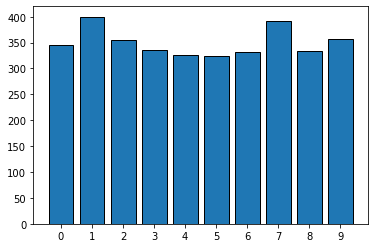

In [10]:
data.digit_distribution()

## Training SVM

### Linear SVM

In [11]:
forests = [
    RandomForest(train=train, test=test, n_estimators=ne, max_depth=md)
    for ne in [100, 200, 300]
    for md in [None, 100]
]

In [12]:
tuning_forests = ClassifierTuning(classifiers=forests, data=train, k=3)

In [13]:
tuning_forests.evaluate_best_model()

2022-12-14 15:32:27.306 | INFO     | assignment_2.digits_classifiers.model:evaluate_best_model:298 - Evaluating classifier: [RandomForest: Train 2800, Test 700] - [N-estimators: 100; Max-Depth: None]
2022-12-14 15:32:27.337 | INFO     | assignment_2.digits_classifiers.model:evaluate:244 -  > Processing fold 1
2022-12-14 15:32:27.962 | INFO     | assignment_2.digits_classifiers.model:evaluate:244 -  > Processing fold 2
2022-12-14 15:32:28.580 | INFO     | assignment_2.digits_classifiers.model:evaluate:244 -  > Processing fold 3
2022-12-14 15:32:29.173 | INFO     | assignment_2.digits_classifiers.model:evaluate_best_model:298 - Evaluating classifier: [RandomForest: Train 2800, Test 700] - [N-estimators: 100; Max-Depth: 100]
2022-12-14 15:32:29.189 | INFO     | assignment_2.digits_classifiers.model:evaluate:244 -  > Processing fold 1
2022-12-14 15:32:29.751 | INFO     | assignment_2.digits_classifiers.model:evaluate:244 -  > Processing fold 2
2022-12-14 15:32:30.314 | INFO     | assignmen

In [14]:
tuning_forests.best_model

[RandomForest: Train 1868, Test 932] - [N-estimators: 200; Max-Depth: 100]

In [15]:
best_forest = tuning_forests.best_model
best_forest.change_dataset(
    train=train,
    test=test
)
best_forest.train()
best_forest.predict()
best_forest.accuracy

0.9457142857142857

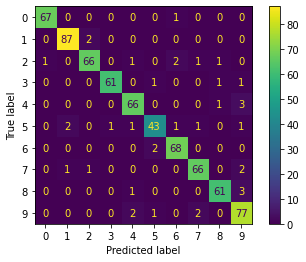

In [16]:
best_forest.confusion_matrix()